In [45]:
import pandas as pd

# Load the data
df = pd.read_csv('Churn_Modelling.csv')

# Display first few rows
print(df.head())

# Basic info
print(df.info())

# Shape of the dataset
print("Dataset shape:", df.shape)

# Checking for nulls
print("Missing values:\n", df.isnull().sum())


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [47]:
# Drop unnecessary columns
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [49]:
# One-hot encode categorical columns
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

# Define features (X) and target (y)
X = df.drop('Exited', axis=1)  # Features
y = df['Exited']               # Target

In [51]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Check shape
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (8000, 11)
Test set shape: (2000, 11)


In [55]:
# Step 4: Train a Supervised Learning Model
from sklearn.linear_model import LogisticRegression

# Initialize the model
log_model = LogisticRegression(max_iter=1000)

# Train the model on the training data
log_model.fit(X_train, y_train)


C:\Users\kumar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [59]:
# Make prediction
# Predict on the test set
y_pred = log_model.predict(X_test)


In [63]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


C:\Users\kumar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
# Accuracy
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.81


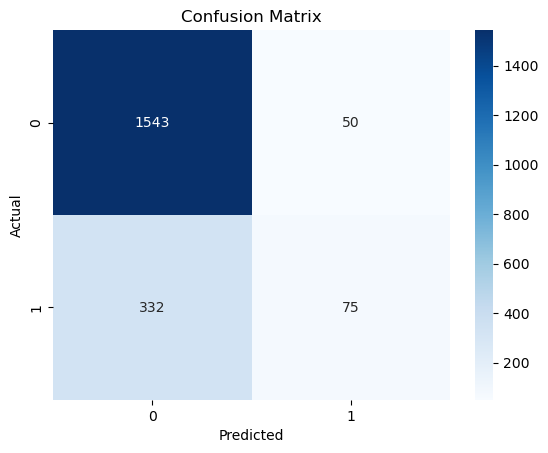

In [69]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [71]:
# Classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.60      0.18      0.28       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [75]:
# Train Logistic Regression Model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Create pipeline: scale then apply logistic regression
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Fit the model
model.fit(X_train, y_train)



Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [77]:
# Make Predictions and Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.808
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.19      0.28       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [79]:
# KNN with the Churn dataset
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [81]:
knn_model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))  # You can tune n_neighbors
knn_model.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [83]:
y_pred_knn = knn_model.predict(X_test)


Accuracy: 0.824

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90      1593
           1       0.62      0.34      0.44       407

    accuracy                           0.82      2000
   macro avg       0.74      0.65      0.67      2000
weighted avg       0.80      0.82      0.80      2000



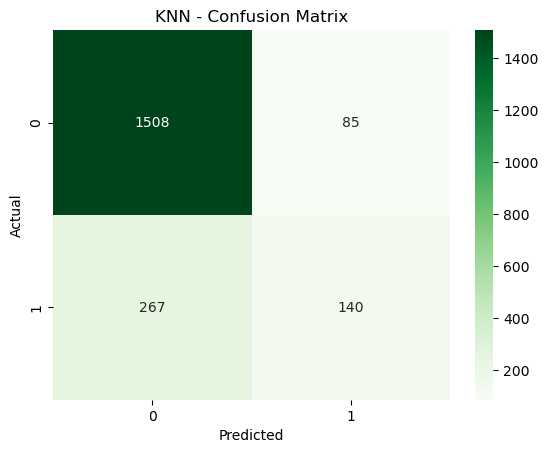

In [85]:
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

# Optional: Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("KNN - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [97]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
knn_pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))


In [99]:
cv_scores = cross_val_score(knn_pipeline, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Average CV Accuracy: {:.2f}%".format(cv_scores.mean() * 100))


Cross-Validation Scores: [0.821  0.8405 0.8205 0.826  0.828 ]
Average CV Accuracy: 82.72%


Cross-Validation Scores: [0.821  0.8405 0.8205 0.826  0.828 ]
Average CV Accuracy: 82.72%


C:\Users\kumar\AppData\Local\Temp\ipykernel_25408\3236498331.py:24: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  plt.grid(False, axis='y', linestyle='--', alpha=0.7)


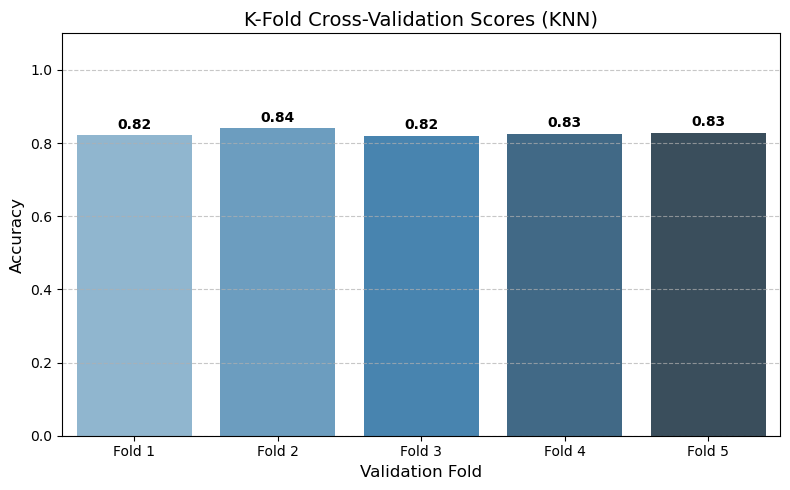

🔍 Average Accuracy: 0.83


In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Pipeline: Scale + KNN
knn_pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))
cv_scores = cross_val_score(knn_pipeline, X, y, cv=5, scoring='accuracy')

# Plot
plt.figure(figsize=(8, 5))
bars = sns.barplot(x=[f'Fold {i+1}' for i in range(len(cv_scores))], y=cv_scores,hue = [f'Fold {i+1}' for i in range(len(cv_scores))], palette='Blues_d')

# Add accuracy values on top of bars
for i, score in enumerate(cv_scores):
    plt.text(i, score + 0.01, f"{score:.2f}", ha='center', va='bottom', fontweight='bold')

plt.ylim(0, 1.1)
plt.title("K-Fold Cross-Validation Scores (KNN)", fontsize=14)
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("Validation Fold", fontsize=12)
plt.grid(False, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(f"🔍 Average Accuracy: {cv_scores.mean():.2f}")


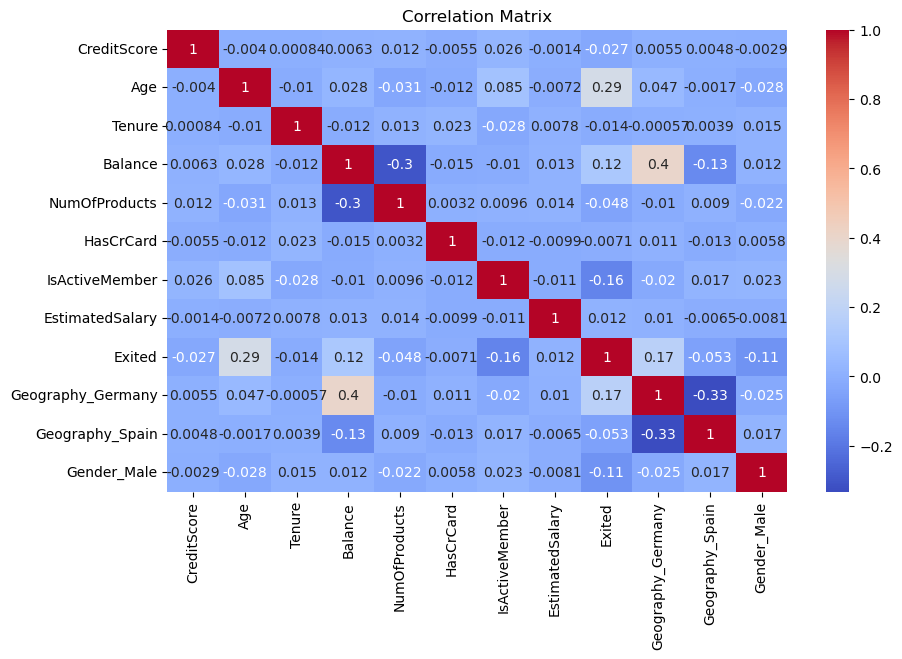

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [124]:
df.dtypes


CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_Germany       bool
Geography_Spain         bool
Gender_Male             bool
dtype: object

In [128]:
df = pd.get_dummies(df, columns=['Geography_Germany'], drop_first=True)


In [130]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender_Male'] = le.fit_transform(df['Gender_Male'])  # Male=1, Female=0


In [134]:
scaler = StandardScaler()

# Select the features (X) and scale them
X = df.drop('Exited', axis=1)  # Exited is the target
y = df['Exited']

X_scaled = scaler.fit_transform(X)

In [140]:
# Example with Logistic Regression:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_reg = LogisticRegression(max_iter=1000)
log_scores = cross_val_score(log_reg, X_scaled, y, cv=5)

print("Logistic Regression CV Scores:", log_scores)
print("Average CV Score:", log_scores.mean())


Logistic Regression CV Scores: [0.811  0.8085 0.8085 0.818  0.8025]
Average CV Score: 0.8097


In [142]:
# Example with KNN:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn_scores = cross_val_score(knn, X_scaled, y, cv=5)

print("KNN CV Scores:", knn_scores)
print("Average CV Score:", knn_scores.mean())


KNN CV Scores: [0.821  0.84   0.82   0.826  0.8275]
Average CV Score: 0.8269


In [144]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5)
    print(f"{name}: {scores.mean():.4f} (+/- {scores.std():.4f})")


Logistic Regression: 0.8097 (+/- 0.0050)
KNN (k=5): 0.8269 (+/- 0.0071)
Random Forest: 0.8630 (+/- 0.0053)


In [146]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1)

# Fit to data
grid_search.fit(X_scaled, y)

# Show best results
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best Accuracy: 0.8674


Decision Tree Accuracy: 0.783

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      1593
           1       0.47      0.51      0.49       407

    accuracy                           0.78      2000
   macro avg       0.67      0.68      0.68      2000
weighted avg       0.79      0.78      0.79      2000



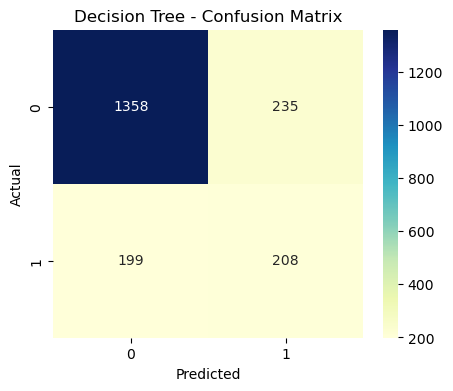

In [148]:
# Train a Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Random Forest Accuracy: 0.8645

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.78      0.46      0.58       407

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000



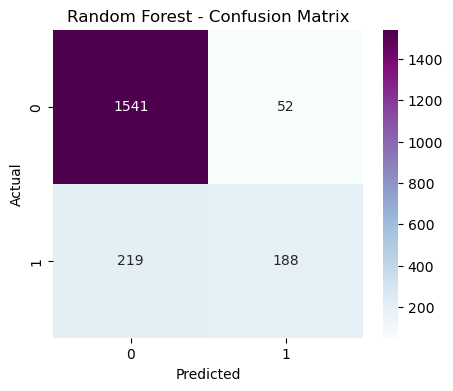

In [150]:
#  Train a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='BuPu')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [152]:
# Compare accuracy of models
dt_accuracy = accuracy_score(y_test, y_pred_dt)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")


Decision Tree Accuracy: 0.78
Random Forest Accuracy: 0.86


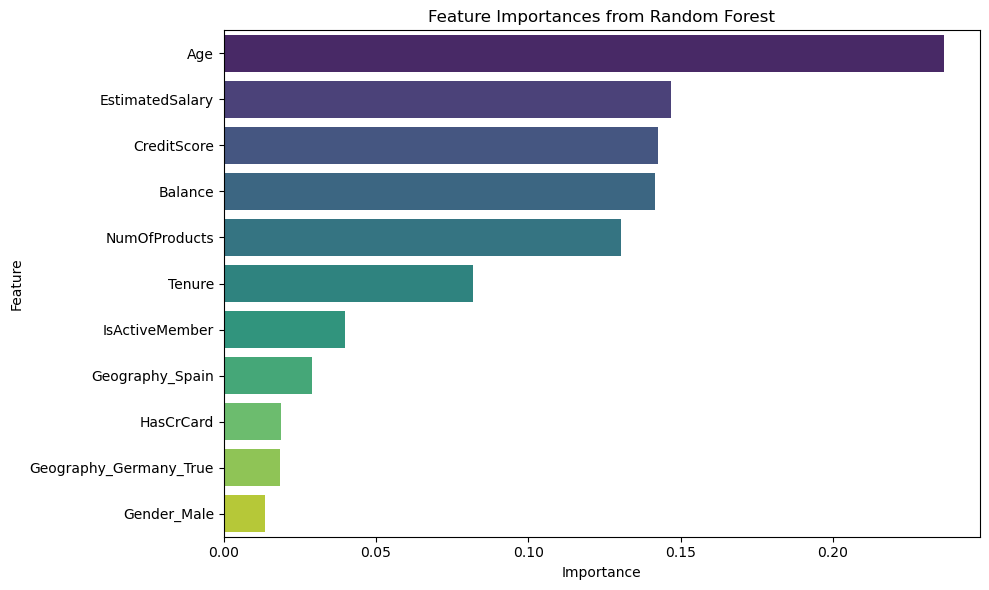

In [160]:
#
# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature',hue = 'Feature', data=feat_df, palette='viridis')
plt.title('Feature Importances from Random Forest')
plt.tight_layout()
plt.show()


In [164]:
# Cross-Validation Scores for Random Forest
from sklearn.model_selection import cross_val_score

cv_scores_rf = cross_val_score(rf_model, X, y, cv=5)
print("Random Forest CV Scores:", cv_scores_rf)
print("Average CV Score:", cv_scores_rf.mean())


Random Forest CV Scores: [0.859  0.871  0.8585 0.8655 0.8595]
Average CV Score: 0.8626999999999999


In [166]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Create a base model
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best Accuracy: 0.8637499999999999


In [169]:
# Check the Best Model Parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best Accuracy: 0.8637499999999999


In [171]:
# Use the Best Model to Predict on Test Set
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)


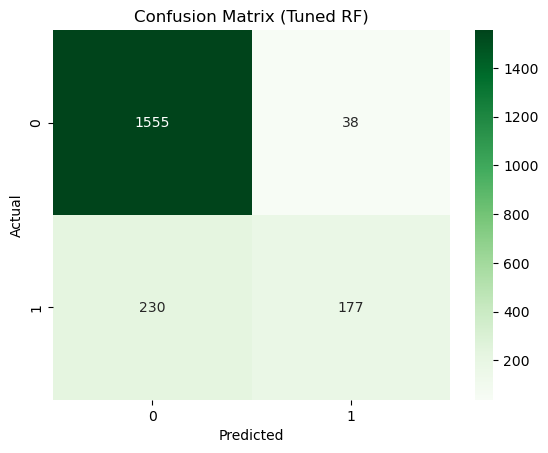

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1593
           1       0.82      0.43      0.57       407

    accuracy                           0.87      2000
   macro avg       0.85      0.71      0.74      2000
weighted avg       0.86      0.87      0.85      2000



In [173]:
# Evaluate Performance on Test Set
from sklearn.metrics import classification_report, confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Tuned RF)")
plt.show()

# Precision, Recall, F1
print(classification_report(y_test, y_pred_best))


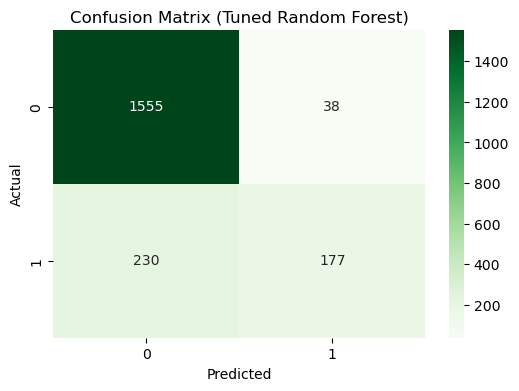

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1593
           1       0.82      0.43      0.57       407

    accuracy                           0.87      2000
   macro avg       0.85      0.71      0.74      2000
weighted avg       0.86      0.87      0.85      2000



In [175]:
# Evaluate Tuned Random Forest Model
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Get the best model
best_rf = grid_search.best_estimator_

# 2. Predict on the test set
y_pred_best = best_rf.predict(X_test)

# 3. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Tuned Random Forest)")
plt.show()

# 4. Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_best))


In [201]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}


In [203]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5)  # assuming X_scaled is your scaled data
    print(f"{name}: Mean Accuracy = {scores.mean():.3f}, Std = {scores.std():.3f}")


Logistic Regression: Mean Accuracy = 0.810, Std = 0.005
K-Nearest Neighbors: Mean Accuracy = 0.827, Std = 0.007
Decision Tree: Mean Accuracy = 0.793, Std = 0.007
Random Forest: Mean Accuracy = 0.864, Std = 0.004


In [205]:
import numpy as np

model_scores = {}

for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5)
    model_scores[name] = scores.mean()


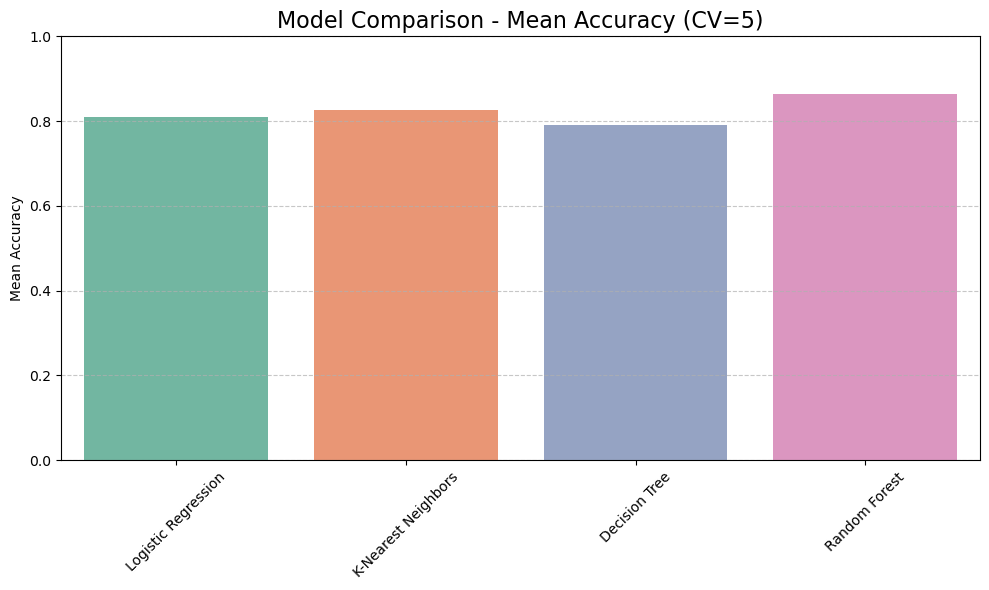

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create DataFrame for plotting
model_names = list(model_scores.keys())
accuracies = list(model_scores.values())

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies,hue = model_names, palette='Set2')

plt.title('Model Comparison - Mean Accuracy (CV=5)', fontsize=16)
plt.ylabel('Mean Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [219]:
from sklearn.model_selection import cross_val_score

models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

cv_scores = {}
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5)
    cv_scores[name] = scores


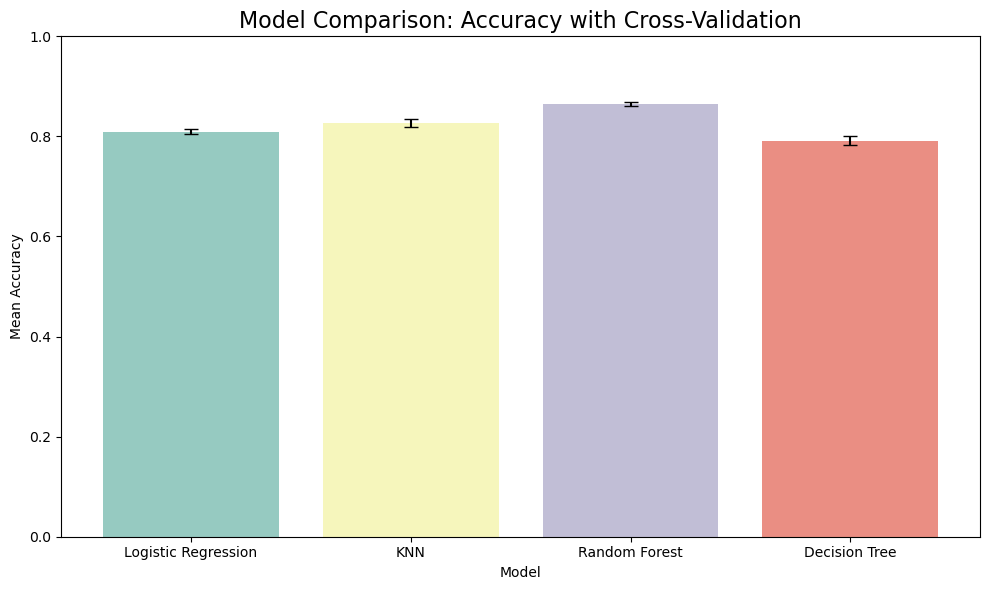

In [229]:
import matplotlib.pyplot as plt
import seaborn as sns

model_names = list(cv_scores.keys())
mean_scores = [cv_scores[model].mean() for model in model_names]
std_scores = [cv_scores[model].std() for model in model_names]

plt.figure(figsize=(10, 6))

# Pass errorbar=None instead of ci=None
sns.barplot(x=model_names, y=mean_scores,hue = model_names,  errorbar=None, palette='Set3')

# Add error bars manually
plt.errorbar(
    x=range(len(model_names)),
    y=mean_scores,
    yerr=std_scores,
    fmt='none',
    c='black',
    capsize=5
)

plt.title('Model Comparison: Accuracy with Cross-Validation', fontsize=16)
plt.ylabel('Mean Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

